#Problem

1. Memahami produk, wilayah, kategori, dan segmen pelanggan
2. Model Regresi untuk memprediksi penjualan
3. Menyediakan wawasan bisnis

#Import Library dan Load Dataset

In [ ]:
import pandas as pd
superdf = pd.read_csv('superstore.csv', encoding='latin1')
superdf

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2014-110422,1/21/2014,1/23/2014,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028
9990,9991,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332
9991,9992,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932
9992,9993,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200


In [ ]:
superdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [ ]:
#Konversi tipe data pada ship date dang order date
superdf['Ship Date'] = pd.to_datetime(superdf['Ship Date'])
superdf['Order Date'] = pd.to_datetime(superdf['Order Date'])

In [ ]:
superdf.describe()

,Row ID,Order Date,Ship Date,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994,9994,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,2016-04-30 00:07:12.259355648,2016-05-03 23:06:58.571142912,55190.379428,229.858001,3.789574,0.156203,28.656896
min,1.000000,2014-01-03 00:00:00,2014-01-07 00:00:00,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,2015-05-23 00:00:00,2015-05-27 00:00:00,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,2016-06-26 00:00:00,2016-06-29 00:00:00,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,2017-05-14 00:00:00,2017-05-18 00:00:00,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,2017-12-30 00:00:00,2018-01-05 00:00:00,99301.000000,22638.480000,14.000000,0.800000,8399.976000
std,2885.163629,NaN,NaN,32063.693350,623.245101,2.225110,0.206452,234.260108


#Profitabilitas Produk

##Produk dengan profit tertinggi dan terendah

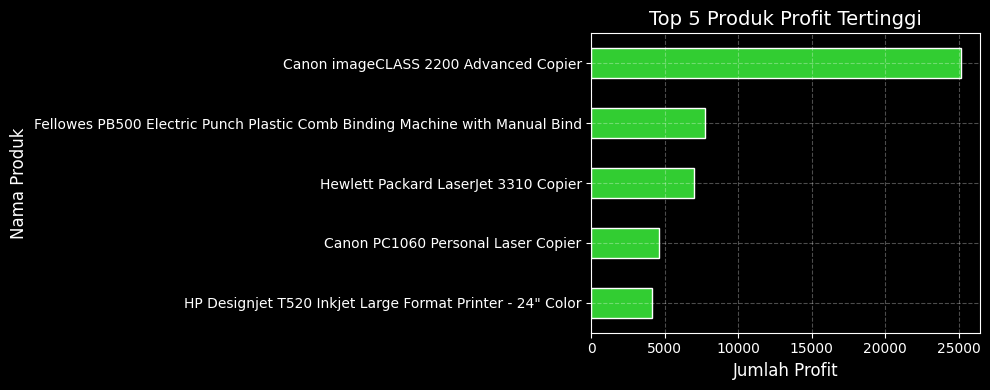

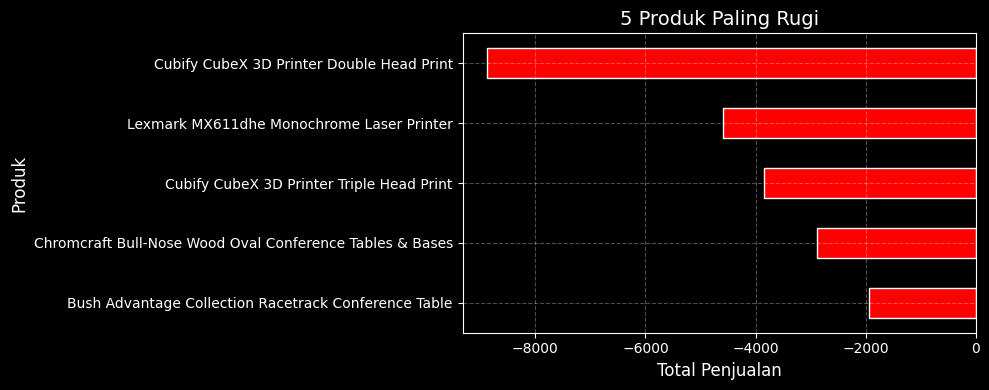

In [ ]:
import matplotlib.pyplot as plt

#Produk untung
produk_untung = superdf.groupby('Product Name')['Profit'].sum().sort_values(ascending = False).head(5)
#produk rugi
produk_rugi = superdf.groupby('Product Name')['Profit'].sum().sort_values(ascending = True).head(5)

#aktifkan style dark
plt.style.use('dark_background')

#visualisasi 5 produk Profit
plt.figure(figsize = (10,4))
produk_untung.plot(kind = 'barh', color = 'limegreen', edgecolor = 'white')
plt.title('Top 5 Produk Profit Tertinggi', fontsize = 14, color = 'white')
plt.xlabel('Jumlah Profit', fontsize = 12, color = 'white')
plt.ylabel('Nama Produk', fontsize = 12, color = 'white')
plt.xticks(color = 'white')
plt.yticks(color = 'white')
plt.grid(True, linestyle = '--', alpha = 0.3)
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# Visualisas 5 Produk Rugi
plt.figure(figsize=(10, 4))
produk_rugi.plot(kind='barh', color='red', edgecolor='white')
plt.title("5 Produk Paling Rugi", fontsize=14, color='white')
plt.xlabel('Total Penjualan', fontsize=12, color='white')
plt.ylabel('Produk', fontsize=12, color='white')
plt.xticks(color='white')
plt.yticks(color='white')
plt.grid(True, linestyle='--', alpha=0.3)
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [ ]:
# 1. Hitung total profit per produk
grouped = superdf.groupby('Product Name')['Profit'].sum().reset_index()

# 2. Hitung total profit semua produk
total_profit = grouped['Profit'].sum()

# 3. Hitung persentase kontribusi per produk
grouped['Profit_%'] = (grouped['Profit'] / total_profit) * 100

# 4. Tampilkan produk yang dimaksud
grouped[grouped['Product Name'] == 'Cubify CubeX 3D Printer Double Head Print']

,Product Name,Profit,Profit_%
475,Cubify CubeX 3D Printer Double Head Print,-8879.9704,-3.100581


In [ ]:
produk_untung

,Profit
Product Name,
Canon imageCLASS 2200 Advanced Copier,25199.9280
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind,7753.0390
Hewlett Packard LaserJet 3310 Copier,6983.8836
Canon PC1060 Personal Laser Copier,4570.9347
"HP Designjet T520 Inkjet Large Format Printer - 24"" Color",4094.9766


In [ ]:
produk_rugi

,Profit
Product Name,
Cubify CubeX 3D Printer Double Head Print,-8879.9704
Lexmark MX611dhe Monochrome Laser Printer,-4589.9730
Cubify CubeX 3D Printer Triple Head Print,-3839.9904
Chromcraft Bull-Nose Wood Oval Conference Tables & Bases,-2876.1156
Bush Advantage Collection Racetrack Conference Table,-1934.3976


##Mengapa ada produk rugi meski penjualan tinggi

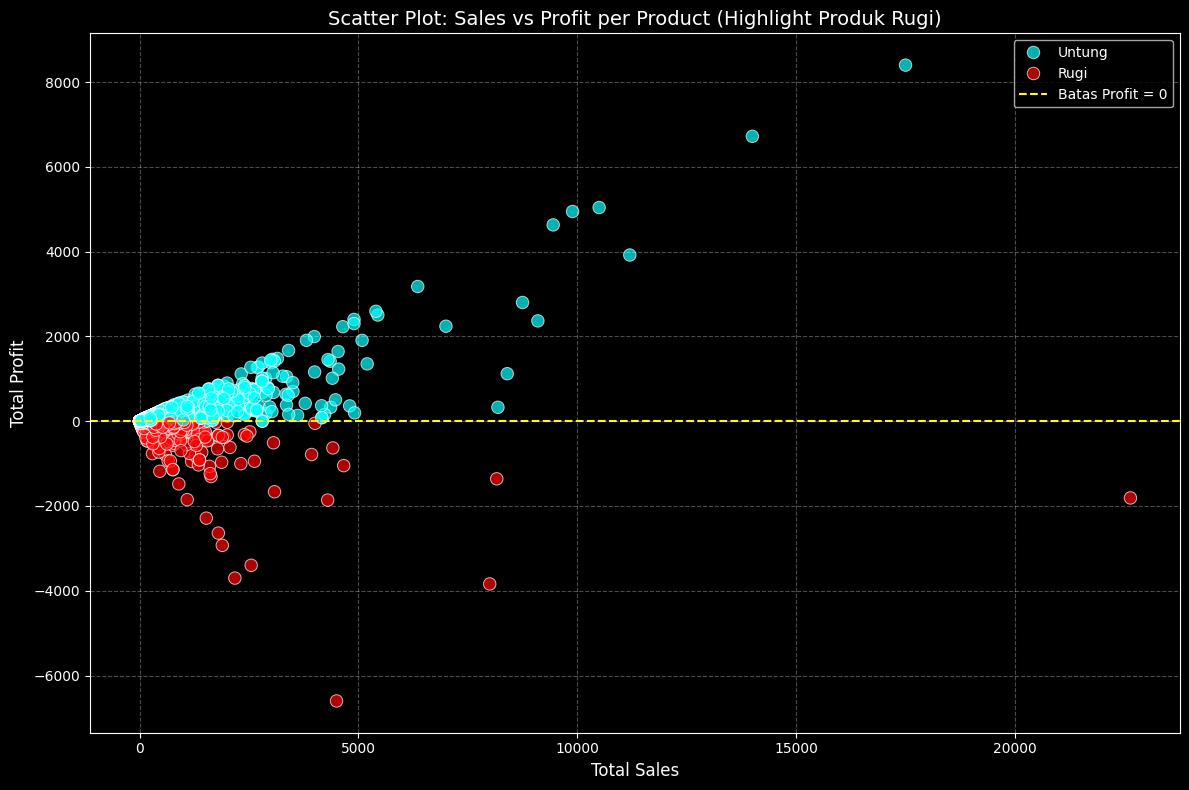

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Buat kolom kategori untuk produk rugi
superdf['Status'] = superdf['Profit'].apply(lambda x: 'Rugi' if x < 0 else 'Untung')

# Gunakan tema gelap
plt.style.use('dark_background')

# Buat scatter plot
plt.figure(figsize=(12, 8))
sns.set_palette('bright')

# Plot scatter data dengan hue berdasarkan status
sns.scatterplot(
    data=superdf,
    x='Sales',
    y='Profit',
    hue='Status',       # warna berdasarkan status
    palette={'Untung':'cyan','Rugi':'red'}, # warna khusus
    alpha=0.7,
    s=80,
    edgecolor='white'
)

# Tambahkan garis batas profit = 0
plt.axhline(0, color='yellow', linestyle='--', linewidth=1.5, label='Batas Profit = 0')

# Label dan styling
plt.title('Scatter Plot: Sales vs Profit per Product (Highlight Produk Rugi)', fontsize=14, color='white')
plt.xlabel('Total Sales', fontsize=12, color='white')
plt.ylabel('Total Profit', fontsize=12, color='white')

# Ubah warna axis dan grid
plt.xticks(color='white')
plt.yticks(color='white')
plt.grid(True, linestyle='--', alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
# Tentukan ambang batas sales tinggi
sales_threshold = superdf['Sales'].quantile(0.90)  # Top 10%

# Filter produk dengan Sales tinggi tapi Profit negatif
high_sales_loss = superdf.groupby('Product Name')[['Sales','Profit','Discount']].sum().reset_index()
high_sales_loss = high_sales_loss[(high_sales_loss['Sales'] >= sales_threshold) & (high_sales_loss['Profit'] < 0)]

print(high_sales_loss)

                                           Product Name     Sales    Profit  \
17    3.6 Cubic Foot Counter Height Office Refrigerator  2946.200 -872.0752   
20       3D Systems Cube Printer, 2nd Generation, White  2339.982 -467.9964   
150           Anker Astro 15000mAh USB Portable Charger   599.880  -23.9952   
168   Atlantic Metals Mobile 4-Shelf Bookcases, Cust...  5184.081 -126.4410   
173                            Avaya 5410 Digital phone   625.508  -10.8784   
...                                                 ...       ...       ...   
1558  Tennsco Stur-D-Stor Boltless Shelving, 5 Shelv...  4384.044  -36.5337   
1575     Tripp Lite Isotel 8 Ultra 8 Outlet Metal Surge   823.252  -17.0328   
1630  Wilson Jones Elliptical Ring 3 1/2" Capacity B...   834.600  -82.1760   
1834  Xerox WorkCentre 6505DN Laser Multifunction Pr...  2519.958 -251.9958   
1838  Zebra GK420t Direct Thermal/Thermal Transfer P...   703.710 -938.2800   

      Discount  
17         2.6  
20         0.7  


In [ ]:
high_sales_loss['Avg_Discount'] = high_sales_loss['Discount'] / superdf.groupby('Product Name')['Discount'].count().loc[high_sales_loss['Product Name']].values
print(high_sales_loss[['Product Name','Sales','Profit','Avg_Discount']])

                                           Product Name     Sales    Profit  \
17    3.6 Cubic Foot Counter Height Office Refrigerator  2946.200 -872.0752   
20       3D Systems Cube Printer, 2nd Generation, White  2339.982 -467.9964   
150           Anker Astro 15000mAh USB Portable Charger   599.880  -23.9952   
168   Atlantic Metals Mobile 4-Shelf Bookcases, Cust...  5184.081 -126.4410   
173                            Avaya 5410 Digital phone   625.508  -10.8784   
...                                                 ...       ...       ...   
1558  Tennsco Stur-D-Stor Boltless Shelving, 5 Shelv...  4384.044  -36.5337   
1575     Tripp Lite Isotel 8 Ultra 8 Outlet Metal Surge   823.252  -17.0328   
1630  Wilson Jones Elliptical Ring 3 1/2" Capacity B...   834.600  -82.1760   
1834  Xerox WorkCentre 6505DN Laser Multifunction Pr...  2519.958 -251.9958   
1838  Zebra GK420t Direct Thermal/Thermal Transfer P...   703.710 -938.2800   

      Avg_Discount  
17        0.520000  
20       

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 147 (\x93) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


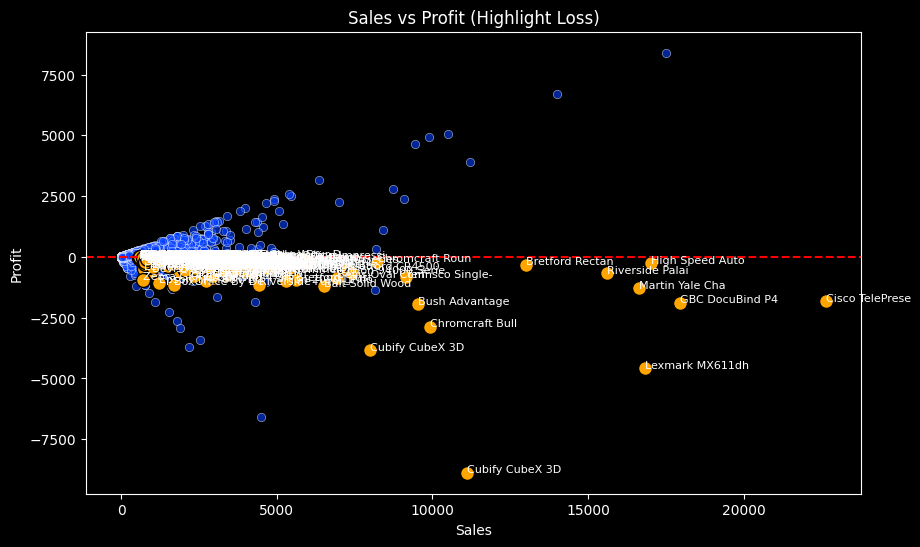

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.scatterplot(data=superdf, x='Sales', y='Profit', alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.title('Sales vs Profit (Highlight Loss)')
plt.xlabel('Sales')
plt.ylabel('Profit')

# Highlight produk yang rugi tapi sales tinggi
for i, row in high_sales_loss.iterrows():
    plt.scatter(row['Sales'], row['Profit'], color='orange', s=100, edgecolor='black')
    plt.text(row['Sales'], row['Profit'], row['Product Name'][:15], fontsize=8)

plt.show()

##Dampak menghapus produk rugi

In [ ]:
total_profit = superdf['Profit'].sum()
print('Total Profit Saat Ini =', total_profit)

Total Profit Saat Ini = 286397.0217


In [ ]:
produk_profit = superdf.groupby('Product Name')['Profit'].sum().reset_index()

# Filter produk yang memiliki profit negatif
loss_products = produk_profit[produk_profit['Profit'] < 0]
print("Produk yang Merugi:")
print(loss_products)

total_loss = loss_products['Profit'].sum()
print("Total Kerugian:", total_loss)


Produk yang Merugi:
                                           Product Name    Profit
17    3.6 Cubic Foot Counter Height Office Refrigerator -872.0752
18                             36X48 HARDFLOOR CHAIRMAT  -40.4914
20       3D Systems Cube Printer, 2nd Generation, White -467.9964
26    3M Replacement Filter for Office Air Cleaner f...  -20.4768
35    ARKON Windshield Dashboard Air Vent Car Mount ...  -15.5940
...                                                 ...       ...
1837  XtraLife ClearVue Slant-D Ring Binders by Card...  -13.3280
1838  Zebra GK420t Direct Thermal/Thermal Transfer P... -938.2800
1843                  i.Sound Portable Power - 8000 mAh  -58.8189
1846                         iOttie HLCRIO102 Car Mount  -11.9940
1847                                iOttie XL Car Mount  -50.3748

[301 rows x 2 columns]
Total Kerugian: -77068.3808


In [ ]:
total_profit_without_loss = total_profit - total_loss
print("Total Profit Setelah Menghapus Produk Rugi:", total_profit_without_loss)

Total Profit Setelah Menghapus Produk Rugi: 363465.40249999997


In [ ]:
impact_percentage = (total_profit_without_loss - total_profit) / total_profit * 100
print(f"Dampak terhadap profit: {impact_percentage:.2f}%")

Dampak terhadap profit: 26.91%


##Produk dengan Margin Tertinggi

In [ ]:
# Hitung total sales dan total profit per produk
produk_margin = superdf.groupby('Product Name')[['Sales','Profit']].sum()

# Hitung margin per produk
produk_margin['Margin'] = produk_margin['Profit'] / produk_margin['Sales']

# Urutkan dari margin tertinggi
produk_margin = produk_margin.sort_values(by='Margin', ascending=False)

# Tampilkan Top 10
print(produk_margin.head(10))

                                                      Sales     Profit  Margin
Product Name                                                                  
Canon imageCLASS MF7460 Monochrome Digital Lase...  3991.98  1995.9900    0.50
Tops Green Bar Computer Printout Paper               342.58   171.2900    0.50
Avery 475                                            266.40   133.2000    0.50
Southworth Structures Collection                      72.80    36.4000    0.50
Xerox 1890                                           244.70   122.3500    0.50
Adams Telephone Message Book w/Frequently-Calle...   223.44   111.7200    0.50
Xerox 1918                                           155.04    75.9696    0.49
Avery 5                                                5.76     2.8224    0.49
Avery 478                                             88.38    43.3062    0.49
Color-Coded Legal Exhibit Labels                      14.73     7.2177    0.49


/tmp/ipython-input-2836862107.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_margin, x='Margin', y='Product Name', palette='viridis')


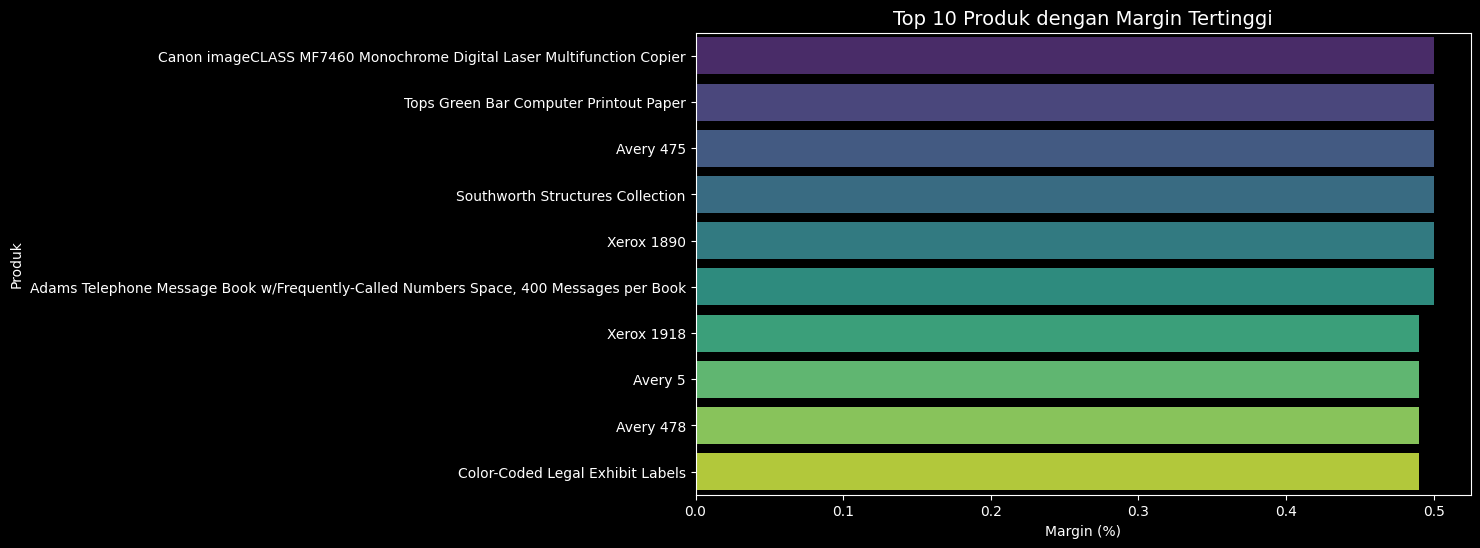

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

top_margin = produk_margin.head(10)

plt.figure(figsize=(10,6))
sns.barplot(data=top_margin, x='Margin', y='Product Name', palette='viridis')
plt.title('Top 10 Produk dengan Margin Tertinggi', fontsize=14)
plt.xlabel('Margin (%)')
plt.ylabel('Produk')
plt.show()


#Profit per Wilayah

##Wilayah Profit Tertinggi dan Terugi

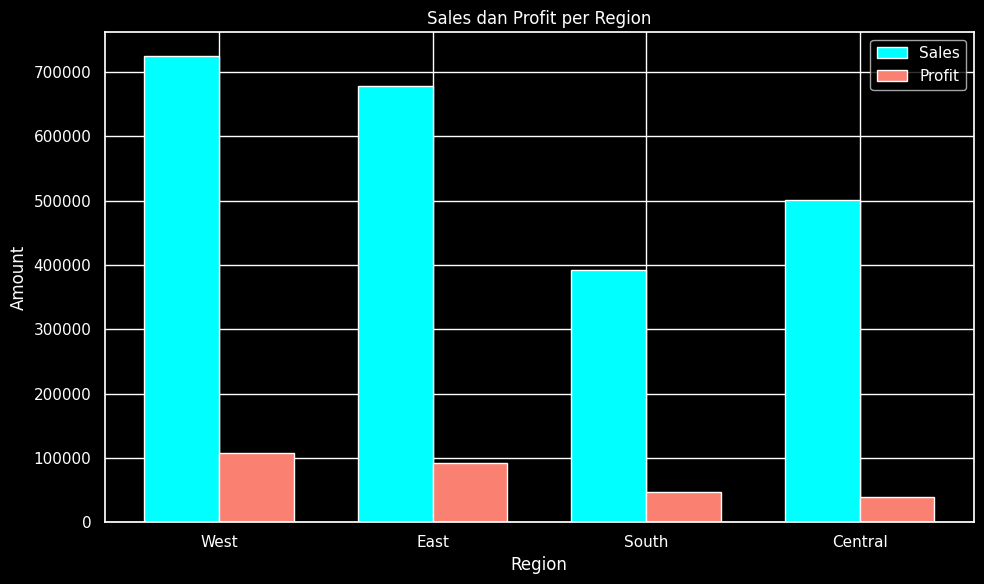

In [ ]:
# Hitung total Sales dan Profit per Region
region_summary = superdf.groupby('Region')[['Sales','Profit']].sum().reset_index()
region_summary = region_summary.sort_values(by='Profit', ascending=False)


# Plot bar chart
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
plt.style.use('dark_background')

# Bar chart untuk Sales dan Profit
bar_width = 0.35
index = range(len(region_summary))

plt.bar(index, region_summary['Sales'], bar_width, label='Sales', color='cyan')
plt.bar([i + bar_width for i in index], region_summary['Profit'], bar_width, label='Profit', color='salmon')

# Tambahkan label dan judul
plt.xlabel('Region')
plt.ylabel('Amount')
plt.title('Sales dan Profit per Region')
plt.xticks([i + bar_width / 2 for i in index], region_summary['Region'])
plt.legend()

plt.tight_layout()
plt.show()

##Penyebab Wilayah Rugi

In [ ]:
# Hitung rata-rata diskon per Region
region_discount = superdf.groupby('Region')['Discount'].mean().reset_index()
region_discount = region_discount.sort_values(by='Discount', ascending=False)

print(region_discount)

    Region  Discount
0  Central  0.240353
2    South  0.147253
1     East  0.145365
3     West  0.109335


In [ ]:
# Gabungkan Sales, Profit, dan rata-rata Discount dalam satu tabel
region_analysis = superdf.groupby('Region').agg({
    'Sales':'sum',
    'Profit':'sum',
    'Discount':'mean'
}).reset_index()

region_analysis['Margin'] = region_analysis['Profit'] / region_analysis['Sales']
print(region_analysis)


    Region        Sales       Profit  Discount    Margin
0  Central  501239.8908   39706.3625  0.240353  0.079216
1     East  678781.2400   91522.7800  0.145365  0.134834
2    South  391721.9050   46749.4303  0.147253  0.119343
3     West  725457.8245  108418.4489  0.109335  0.149448


##Dampak Jika Diskon dikurangi

Simulasi: Jika Diskon Dikurangi 10%
Asumsi:

New Discount = Discount * 0.9 (10% lebih rendah)

Sales tetap sama

Profit baru dihitung berdasarkan selisih diskon → Pendekatan sederhana

In [ ]:
# Salin data untuk simulasi
simulation = region_analysis.copy()

# Kurangi diskon 10%
simulation['Discount_new'] = simulation['Discount'] * 0.9

# Estimasi profit baru: asumsikan setiap 1% diskon mengurangi profit setara dengan Sales * Diskon
simulation['Estimated_Profit_New'] = simulation['Profit'] + (simulation['Discount'] - simulation['Discount_new']) * simulation['Sales']

# Hitung perubahan profit
simulation['Profit_Change'] = simulation['Estimated_Profit_New'] - simulation['Profit']

print(simulation[['Region','Profit','Estimated_Profit_New','Profit_Change']])

    Region       Profit  Estimated_Profit_New  Profit_Change
0  Central   39706.3625          51753.813237   12047.450737
1     East   91522.7800         101389.894935    9867.114935
2    South   46749.4303          52517.656253    5768.225953
3     West  108418.4489         116350.241911    7931.793011


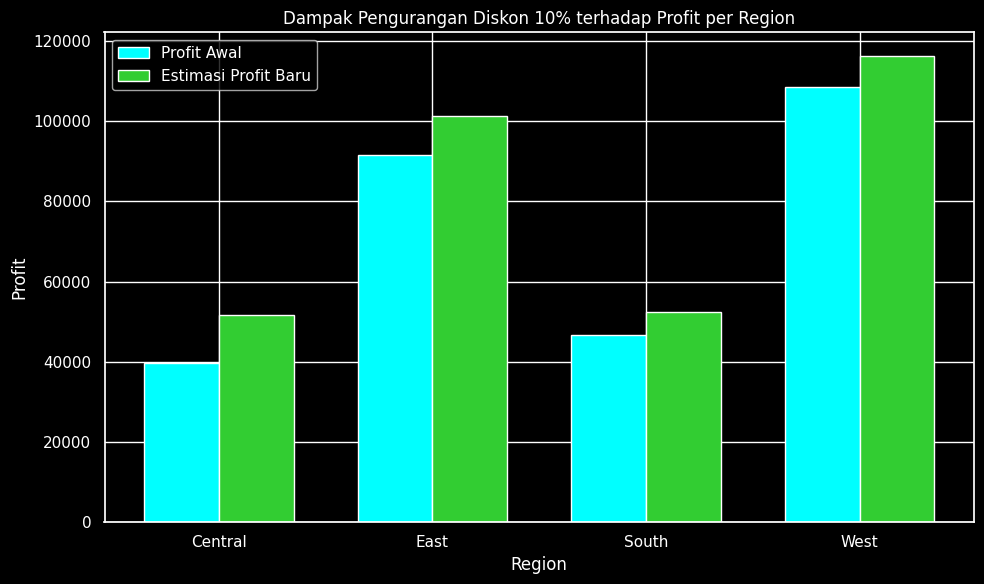

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.set(style='whitegrid')
plt.style.use('dark_background')

# Bar plot: Profit Sebelum vs Profit Estimasi Setelah Diskon Dikurangi
x = simulation['Region']
bar_width = 0.35
index = range(len(x))

plt.bar(index, simulation['Profit'], width=bar_width, label='Profit Awal', color='cyan')
plt.bar([i + bar_width for i in index], simulation['Estimated_Profit_New'], width=bar_width, label='Estimasi Profit Baru', color='limegreen')

plt.xlabel('Region')
plt.ylabel('Profit')
plt.title('Dampak Pengurangan Diskon 10% terhadap Profit per Region')
plt.xticks([i + bar_width / 2 for i in index], x)
plt.legend()
plt.tight_layout()
plt.show()


##Peluang Ekspansi

In [ ]:
# Urutkan berdasarkan margin tertinggi tapi sales rendah
expansion_opportunity = region_analysis.sort_values(by=['Margin','Sales'], ascending=[False,True])
print(expansion_opportunity)

    Region        Sales       Profit  Discount    Margin
3     West  725457.8245  108418.4489  0.109335  0.149448
1     East  678781.2400   91522.7800  0.145365  0.134834
2    South  391721.9050   46749.4303  0.147253  0.119343
0  Central  501239.8908   39706.3625  0.240353  0.079216


/tmp/ipython-input-196704580.py:10: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  sns.scatterplot(


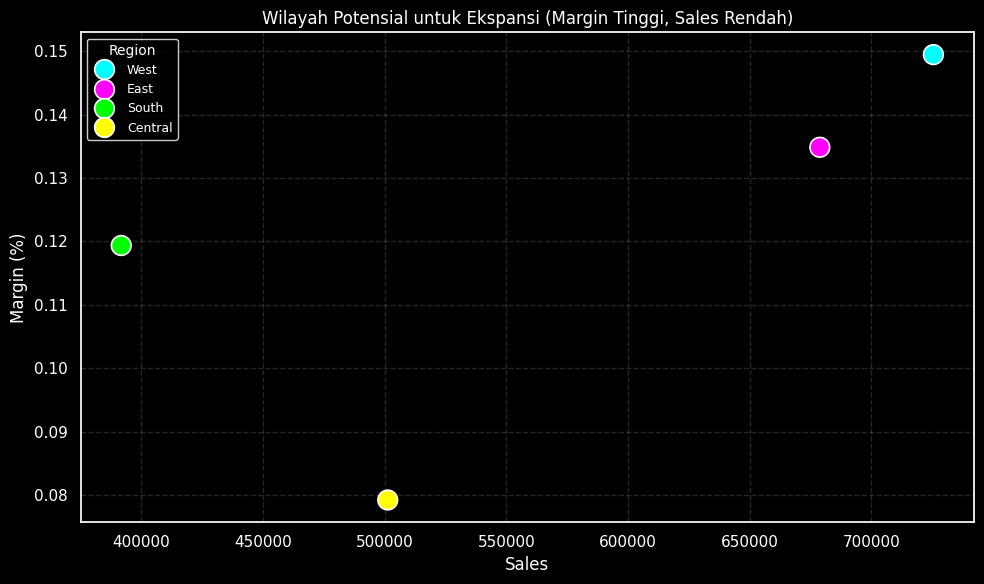

In [ ]:
# Ambil top 5 wilayah dengan margin tinggi tapi sales rendah
top_expansion = expansion_opportunity.head(5)

plt.style.use('dark_background')
plt.figure(figsize=(10, 6))

# Gunakan warna cerah secara manual
bright_colors = ['cyan', 'magenta', 'lime', 'yellow', 'orange']

sns.scatterplot(
    data=top_expansion,
    x='Sales',
    y='Margin',
    hue='Region',
    palette=bright_colors,
    s=200,
    edgecolor='white',
    linewidth=1.2
)

plt.title('Wilayah Potensial untuk Ekspansi (Margin Tinggi, Sales Rendah)', color='white')
plt.xlabel('Sales', color='white')
plt.ylabel('Margin (%)', color='white')
plt.xticks(color='white')
plt.yticks(color='white')
plt.grid(True, color='gray', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.legend(title='Region', facecolor='black', edgecolor='white', labelcolor='white', title_fontsize=10, fontsize=9)
plt.show()


## Visualisasi

###Bar Chart Sales & Profit per Region

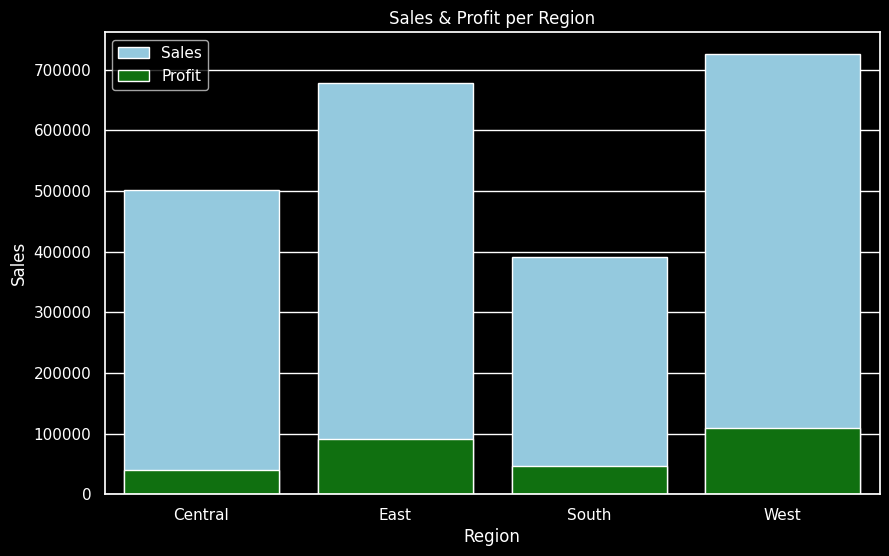

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(data=region_analysis, x='Region', y='Sales', color='skyblue', label='Sales')
sns.barplot(data=region_analysis, x='Region', y='Profit', color='green', label='Profit')
plt.title('Sales & Profit per Region')
plt.legend()
plt.show()

###Scatter Plot Discount vs Profit per Region

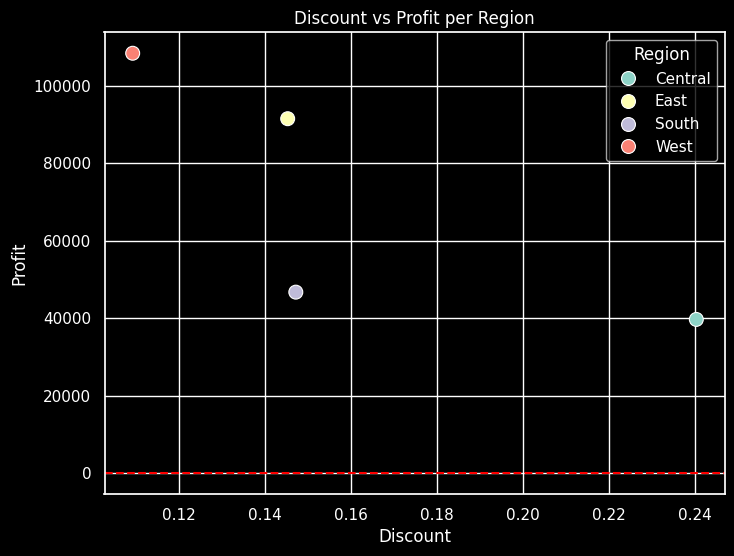

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=region_analysis, x='Discount', y='Profit', hue='Region', s=100)
plt.title('Discount vs Profit per Region')
plt.axhline(0, color='red', linestyle='--')
plt.show()

#Kategori dan sub Kategori

##Kategori dan sub-kategori mana yang paling menguntungkan?

/tmp/ipython-input-1955771472.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = profit_kategori, x = 'Category', y = 'Profit', palette = 'viridis')


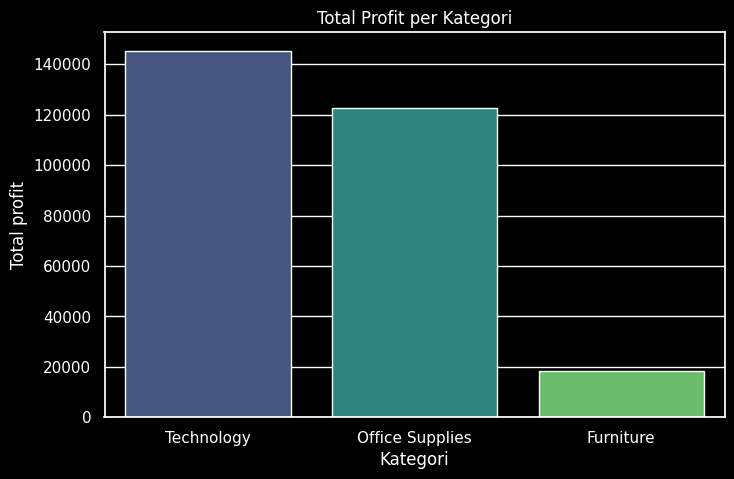

          Category       Profit
0       Technology  145454.9481
1  Office Supplies  122490.8008
2        Furniture   18451.2728


In [ ]:
#Kategori
profit_kategori = superdf.groupby('Category')['Profit'].sum().sort_values(ascending = False).reset_index()
plt.figure(figsize =(8,5))
sns.barplot(data = profit_kategori, x = 'Category', y = 'Profit', palette = 'viridis')
plt.title('Total Profit per Kategori')
plt.xlabel('Kategori')
plt.ylabel('Total profit')
plt.show()
print(profit_kategori)

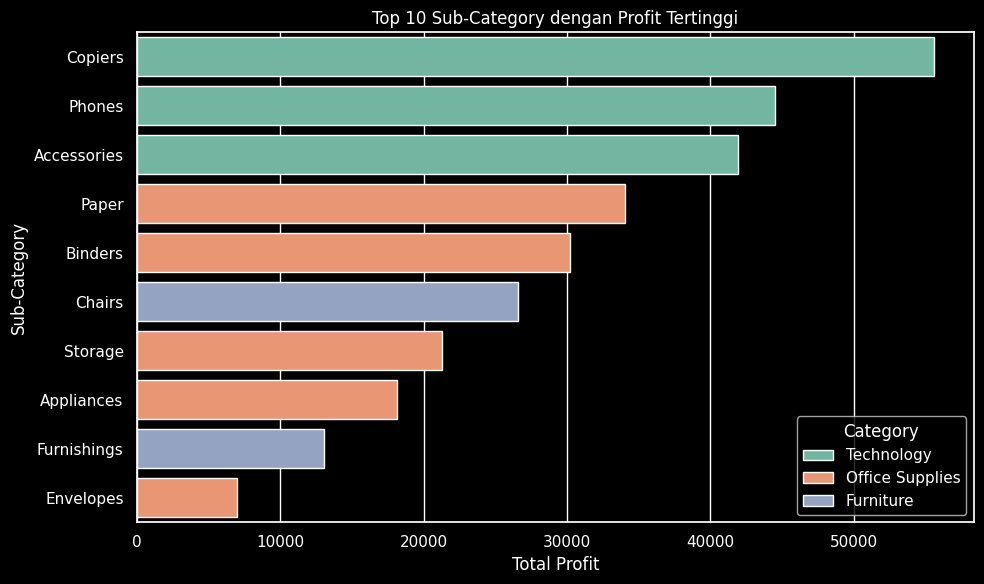

In [ ]:
subcategory_profit = superdf.groupby(['Category', 'Sub-Category'])['Profit'].sum().sort_values(ascending=False).reset_index()

plt.figure(figsize=(10,6))
sns.barplot(data=subcategory_profit.head(10), x='Profit', y='Sub-Category', hue='Category', dodge=False, palette='Set2')
plt.title('Top 10 Sub-Category dengan Profit Tertinggi')
plt.xlabel('Total Profit')
plt.ylabel('Sub-Category')
plt.grid(True, axis='x')
plt.tight_layout()
plt.show()


##Apakah kategori dengan profit rendah memiliki potensi pertumbuhan?

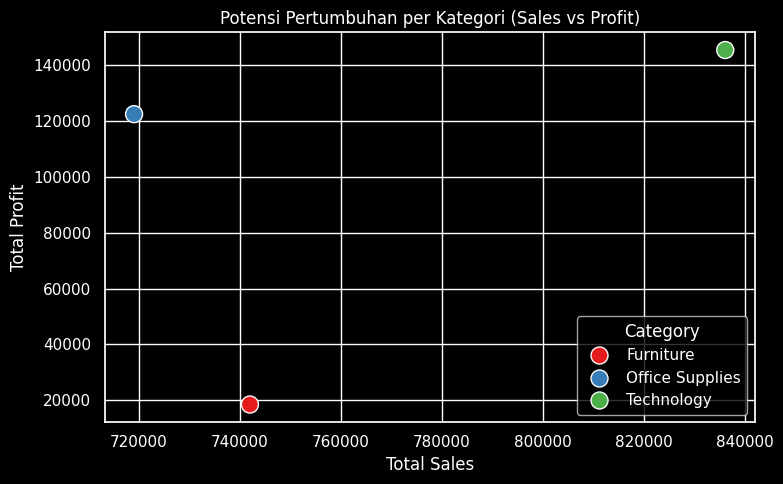

In [ ]:
growth_potential = superdf.groupby('Category')[['Sales', 'Profit']].sum().reset_index()
growth_potential['Profit_Margin'] = growth_potential['Profit'] / growth_potential['Sales']
growth_potential = growth_potential.sort_values(by='Profit_Margin')

plt.figure(figsize=(8,5))
sns.scatterplot(data=growth_potential, x='Sales', y='Profit', hue='Category', s=150, palette='Set1')
plt.title('Potensi Pertumbuhan per Kategori (Sales vs Profit)')
plt.xlabel('Total Sales')
plt.ylabel('Total Profit')
plt.grid(True)
plt.tight_layout()
plt.show()

##Jika fokus pada 3 sub-kategori terbaik, berapa peningkatan profit yang bisa dicapai?

Misalnya kamu ingin meningkatkan penjualan 20% di 3 subkategori paling untung, hitung estimasi kenaikan profit-nya

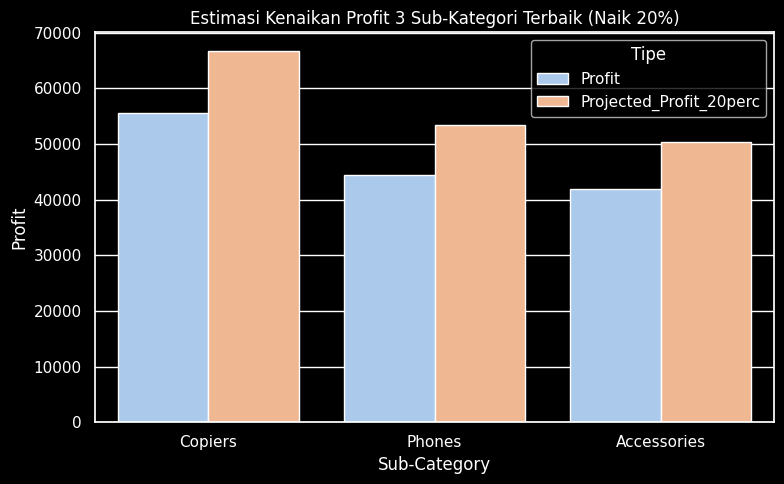

In [ ]:
# Data top 3 subkategori paling menguntungkan
top3_subcat = subcategory_profit.head(3).copy()
top3_subcat['Projected_Profit_20perc'] = top3_subcat['Profit'] * 1.2
top3_subcat['Increment'] = top3_subcat['Projected_Profit_20perc'] - top3_subcat['Profit']

# Melting data untuk visualisasi
top3_melted = pd.melt(
    top3_subcat,
    id_vars='Sub-Category',
    value_vars=['Profit', 'Projected_Profit_20perc'],
    var_name='Tipe',
    value_name='Profit_Value'  # Ganti agar tidak sama dengan kolom asli
)

# Visualisasi
plt.figure(figsize=(8,5))
sns.barplot(data=top3_melted, x='Sub-Category', y='Profit_Value', hue='Tipe', palette='pastel')
plt.title('Estimasi Kenaikan Profit 3 Sub-Kategori Terbaik (Naik 20%)')
plt.ylabel('Profit')
plt.xlabel('Sub-Category')
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

#Segmentasi Pelanggan

##Segmen pelanggan mana yang paling banyak berkontribusi terhadap penjualan dan profit?

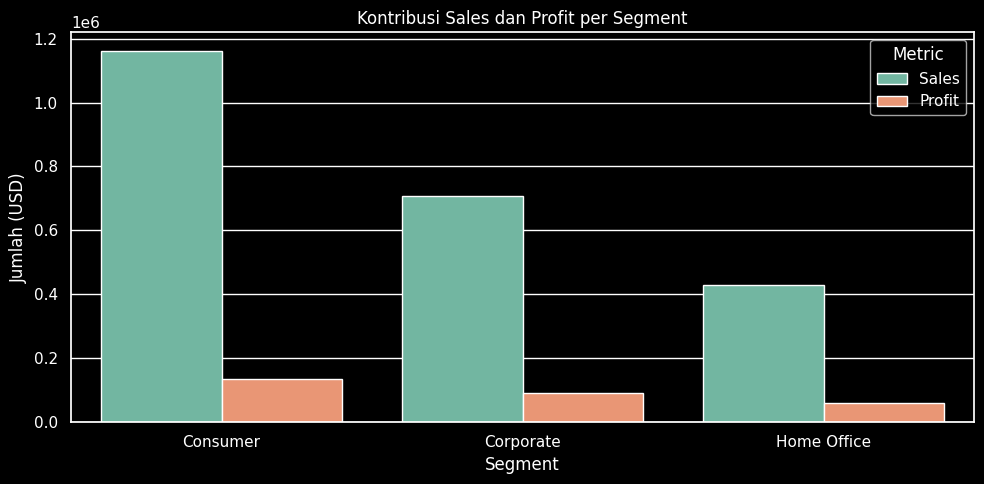

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
segment_group = superdf.groupby('Segment')[['Sales', 'Profit']].sum().reset_index()

segment_group = segment_group.sort_values('Sales', ascending=False)

segment_group_melted = segment_group.melt(id_vars='Segment', value_vars=['Sales', 'Profit'],
                                          var_name='Metric', value_name='Amount')

sns.barplot(data=segment_group_melted, x='Segment', y='Amount', hue='Metric', palette='Set2')
plt.title('Kontribusi Sales dan Profit per Segment')
plt.ylabel('Jumlah (USD)')
plt.xlabel('Segment')
plt.tight_layout()
plt.show()

##Apakah pelanggan segmen tertentu lebih sensitif terhadap diskon?

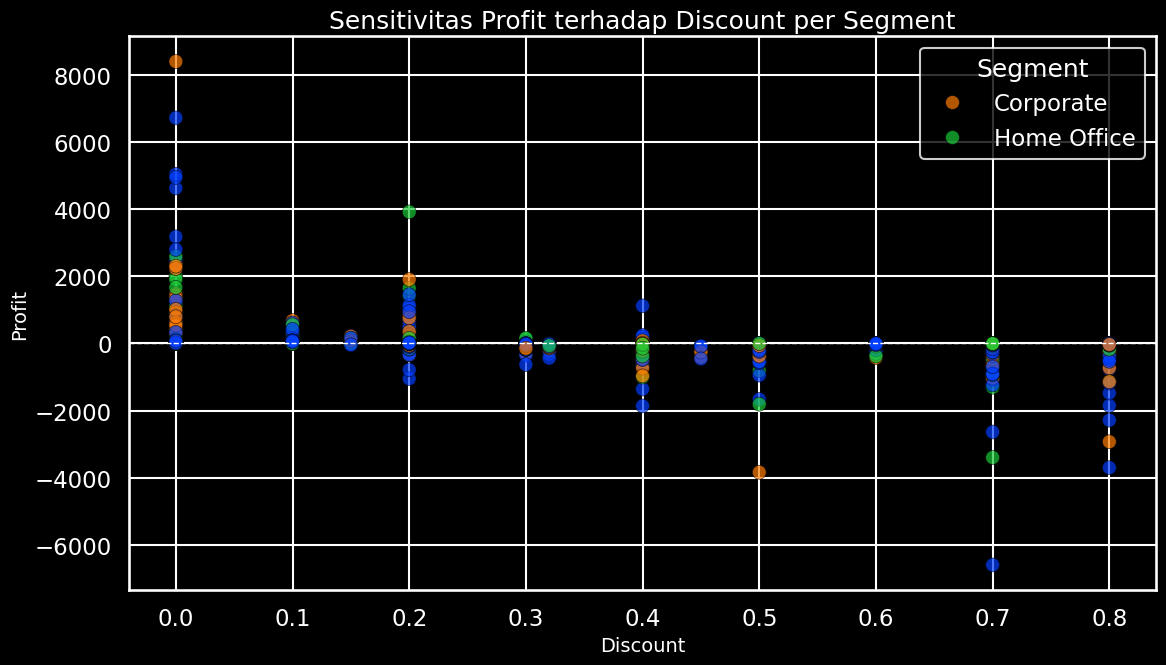

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('dark_background')
sns.set_context('talk')

plt.figure(figsize=(12, 7))

# Scatter plot tanpa legend size
scatter = sns.scatterplot(
    data=superdf,
    x='Discount',
    y='Profit',
    hue='Segment',
    alpha=0.7,
    palette='bright',
    edgecolor='black',
    linewidth=0.5,
    s=100  # Ukuran titik tetap, tidak berdasarkan Sales
)

# Garis horizontal di Profit = 0
plt.axhline(0, color='white', linestyle='--', linewidth=1)

# Judul dan Label
plt.title('Sensitivitas Profit terhadap Discount per Segment', fontsize=18, color='white')
plt.xlabel('Discount', fontsize=14, color='white')
plt.ylabel('Profit', fontsize=14, color='white')

# Ubah warna axis label dan tick ke putih agar kontras
plt.xticks(color='white')
plt.yticks(color='white')

# Legend hanya untuk hue (Segment)
handles, labels = scatter.get_legend_handles_labels()
plt.legend(handles=handles[1:], labels=labels[1:], title='Segment', loc='upper right', labelcolor='white', facecolor='black', edgecolor='white')

plt.tight_layout()
plt.show()

## Jika kita menargetkan segmen dengan margin tertinggi, bagaimana dampaknya terhadap profit?

In [ ]:
# Hitung Margin = Profit / Sales
superdf['Margin'] = superdf['Profit'] / superdf['Sales']

# Rata-rata margin per segment
segment_margin = superdf.groupby('Segment')['Margin'].mean().reset_index().sort_values(by='Margin', ascending=False)

# Tampilkan segment dengan margin tertinggi
top_segment = segment_margin.iloc[0]['Segment']

# Simulasikan kenaikan penjualan segmen tersebut sebanyak 20%
top_segment_profit = superdf[superdf['Segment'] == top_segment]['Profit'].sum()
estimated_profit = top_segment_profit * 1.2  # Misal penjualan naik 20%

print(f"Jika fokus ke segmen '{top_segment}' dan penjualan naik 20%, profit bisa meningkat dari {top_segment_profit:,.2f} menjadi {estimated_profit:,.2f}")


Jika fokus ke segmen 'Home Office' dan penjualan naik 20%, profit bisa meningkat dari 60,298.68 menjadi 72,358.41


/tmp/ipython-input-2939433490.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=segment_margin, x='Segment', y='Margin', palette='coolwarm')


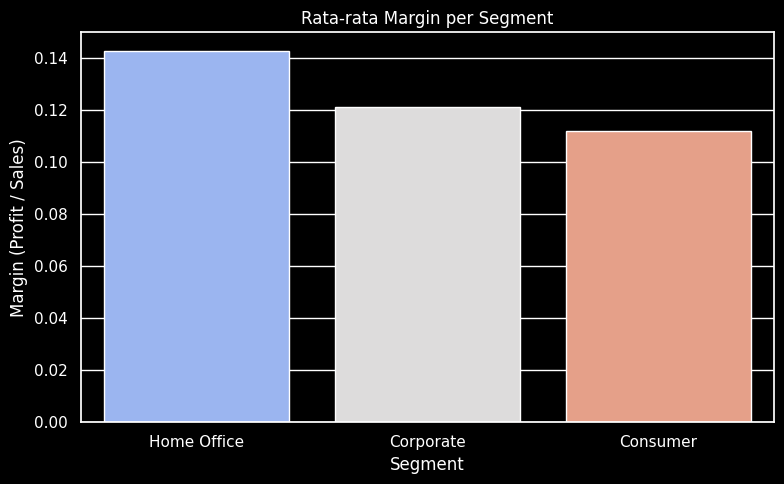

In [ ]:
plt.figure(figsize=(8, 5))
sns.barplot(data=segment_margin, x='Segment', y='Margin', palette='coolwarm')
plt.title('Rata-rata Margin per Segment')
plt.ylabel('Margin (Profit / Sales)')
plt.xlabel('Segment')
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()


#Tren Penjualan

##Bagaimana pola tren penjualan dan profit per bulan?

/tmp/ipython-input-1677971653.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = superdf.resample('M', on = 'Order Date')['Sales'].sum() #mengelompokkan data penjualan per bulan (M = Monthly).


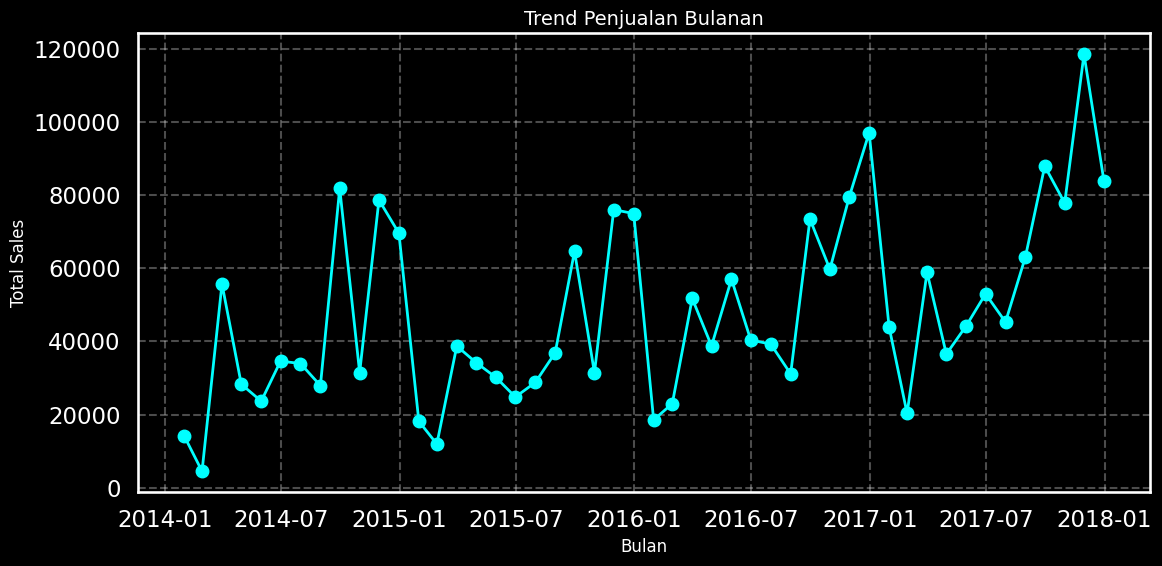

In [ ]:
#ambil data sales bulanan
monthly_sales = superdf.resample('M', on = 'Order Date')['Sales'].sum() #mengelompokkan data penjualan per bulan (M = Monthly).
monthly_sales = monthly_sales.to_frame().reset_index() #mengubah Series jadi DataFrame dan reset index agar rapi.

# Aktifkan style dark
plt.style.use('dark_background')

# Plot
plt.figure(figsize=(12,6))
plt.plot(monthly_sales['Order Date'], monthly_sales['Sales'], marker='o', color='cyan', linewidth=2)

# Tambahkan detail
plt.title('Trend Penjualan Bulanan', fontsize=14, color='white')
plt.xlabel('Bulan', fontsize=12, color='white')
plt.ylabel('Total Sales', fontsize=12, color='white')

# Atur warna sumbu
plt.xticks(color='white')
plt.yticks(color='white')

# Grid
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

## Mengapa ada penurunan penjualan di bulan tertentu?

In [ ]:
superdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [ ]:
# Ubah kolom Order Date ke datetime
superdf['Order Date'] = pd.to_datetime(superdf['Order Date'])

# Buat kolom bulan-tahun
superdf['Month_Year'] = superdf['Order Date'].dt.to_period('M').astype(str)

# Group data per bulan
monthly_sales = superdf.groupby('Month_Year')[['Sales', 'Profit']].sum().reset_index()

# Contoh ambil bulan dengan penurunan signifikan
penurunan_bulan = '2017-09'  # misal
superdf[superdf['Month_Year'] == penurunan_bulan].groupby('Segment')[['Sales', 'Discount']].agg(['sum', 'mean'])


Sales             Discount          
                   sum        mean      sum      mean
Segment                                              
Consumer     43857.203  183.502941    34.75  0.145397
Corporate    24105.103  173.418007    19.60  0.141007
Home Office  19904.346  245.732667    13.30  0.164198

##Jika kita menambah promo di bulan yang biasanya rendah, apakah bisa meningkatkan penjualan?

In [ ]:
low_months = ['2017-09', '2016-02']  # contoh bulan rendah

# Rata-rata diskon dan penjualan
for month in low_months:
    temp = superdf[superdf['Month_Year'] == month]
    print(f"Bulan: {month}")
    print(temp[['Sales', 'Discount']].describe())

Bulan: 2017-09
             Sales    Discount
count   459.000000  459.000000
mean    191.430614    0.147386
std     412.474722    0.198035
min       1.556000    0.000000
25%      15.660000    0.000000
50%      47.584000    0.100000
75%     183.212000    0.200000
max    4663.736000    0.800000
Bulan: 2016-02
             Sales   Discount
count    83.000000  83.000000
mean    276.853193   0.096386
std     972.012710   0.176998
min       3.762000   0.000000
25%      22.275000   0.000000
50%      89.970000   0.000000
75%     240.740000   0.200000
max    8749.950000   0.800000


##Bagaimana Prediksi Penjualan Selama 6 Bulan Kedepan Menggunakan Model Regresi ?

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpil2o1t66/6m2r9qxu.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpil2o1t66/1og_1sfy.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=57764', 'data', 'file=/tmp/tmpil2o1t66/6m2r9qxu.json', 'init=/tmp/tmpil2o1t66/1og_1sfy.json', 'output', 'file=/tmp/tmpil2o1t66/prophet_modelaca_pjyk/prophet_model-20250731130409.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
13:04:09 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:04:09 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.11/dist-packages

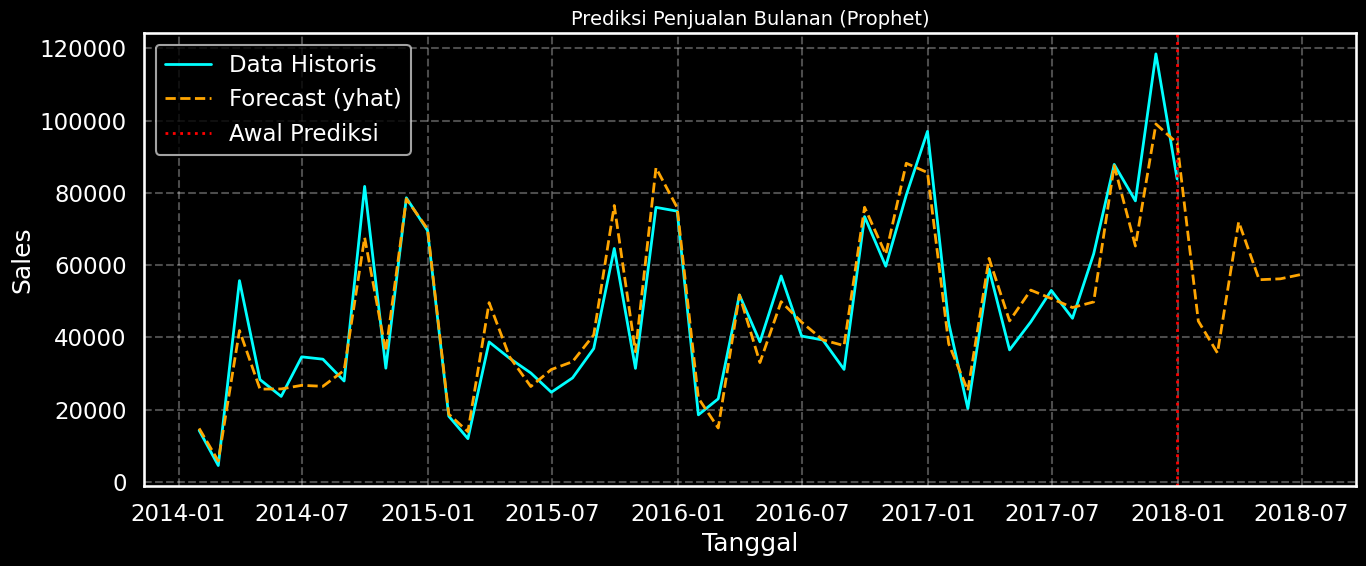

In [ ]:
from prophet import Prophet
import pandas as pd
import matplotlib.pyplot as plt

# Pastikan tanggal dalam datetime
monthly_sales['Order Date'] = pd.to_datetime(monthly_sales['Order Date'])

# Rename kolom agar sesuai format Prophet
df_prophet = monthly_sales.rename(columns={'Order Date': 'ds', 'Sales': 'y'})

# Inisialisasi dan fit model Prophet
model = Prophet()
model.fit(df_prophet)

# Buat prediksi 6 bulan ke depan
future = model.make_future_dataframe(periods=6, freq='M')
forecast = model.predict(future)

# Plot hasil prediksi dengan background hitam
plt.style.use('dark_background')
plt.figure(figsize=(14, 6))

# Plot data historis
plt.plot(df_prophet['ds'], df_prophet['y'], label='Data Historis', color='cyan', linewidth=2)

# Plot hasil prediksi
plt.plot(forecast['ds'], forecast['yhat'], label='Forecast (yhat)', color='orange', linestyle='--', linewidth=2)

# Garis batas antara data historis dan prediksi
last_date = df_prophet['ds'].max()
plt.axvline(x=last_date, color='red', linestyle=':', linewidth=2, label='Awal Prediksi')

# Label dan legenda
plt.title('Prediksi Penjualan Bulanan (Prophet)', fontsize=14)
plt.xlabel('Tanggal')
plt.ylabel('Sales')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

In [ ]:
superdf.to_csv('superstore_bersih.csv', index= False)